In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/Data/Dataset_Olahraga.csv')

In [ ]:
df.head()

,Tinggi (cm),Berat (kg),Tingkat Aktivitas,Tujuan,Kategori,Durasi (menit),Kalori Terbakar,Umur,Jenis Kelamin,Rekomendasi Olahraga
0,162,100,Tinggi,Pemeliharaan Kebugaran,Kekuatan,44,462,44,Pria,Angkat Beban
1,171,67,Tinggi,Pemeliharaan Kebugaran,Kardio,31,203,34,Wanita,Bersepeda
2,150,64,Sedang,Pemeliharaan Kebugaran,Kekuatan,35,667,42,Pria,Angkat Beban
3,141,58,Tinggi,Pemeliharaan Kebugaran,Fleksibilitas,59,683,34,Wanita,Senam
4,196,58,Sedang,Peningkatan Massa Otot,Kardio,65,492,45,Wanita,Bersepeda


##NORMALISASI DATA

In [ ]:
# Selecting columns for normalization and encoding
numeric_features = ['Tinggi (cm)', 'Berat (kg)', 'Durasi (menit)', 'Kalori Terbakar', 'Umur']
categorical_features = ['Tingkat Aktivitas', 'Tujuan', 'Kategori', 'Jenis Kelamin']
target_column = 'Rekomendasi Olahraga'

In [ ]:
# Separating features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

In [ ]:
# Encoding categorical features
X_encoded = pd.get_dummies(X[categorical_features])
X_combined = pd.concat([X[numeric_features], X_encoded], axis=1)

In [ ]:
# Normalizing numeric features
scaler = StandardScaler()
X_combined[numeric_features] = scaler.fit_transform(X_combined[numeric_features])

In [ ]:
# Encoding target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42)

# Displaying a sample of the processed data
X_train.head(), y_train[:5]

(      Tinggi (cm)  Berat (kg)  Durasi (menit)  Kalori Terbakar      Umur  \
 4227    -1.209086   -0.416585        0.291544         0.807237 -0.888258   
 4676    -0.528671    0.260789        0.291544         0.185771 -1.321605   
 800     -1.152385   -0.077898        0.291544        -0.310147  0.484004   
 3671    -0.642074   -1.347973       -0.161076        -0.178321 -1.032707   
 4193     0.435250   -0.712936        1.309938        -0.366644 -0.599361   
 
       Tingkat Aktivitas_Rendah  Tingkat Aktivitas_Sedang  \
 4227                     False                      True   
 4676                     False                     False   
 800                      False                     False   
 3671                     False                     False   
 4193                     False                      True   
 
       Tingkat Aktivitas_Tinggi  Tujuan_Pemeliharaan Kebugaran  \
 4227                     False                          False   
 4676                      True     

##MODEL

In [ ]:
# Membuat model Dense Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # input layer sesuai jumlah fitur
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(set(y_encoded)), activation='softmax')  # output sesuai jumlah kelas
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Mengompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Melatih model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6035 - loss: 1.0677 - val_accuracy: 0.9970 - val_loss: 0.1592
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0923 - val_accuracy: 1.0000 - val_loss: 0.0150
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.4871e-04 - val_accuracy: 1.0000 - val_loss: 7.1733e-04
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.7622e-04 - val_

In [ ]:
# Mengevaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy on Test Data: {accuracy * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.1459e-06 
Accuracy on Test Data: 100.00%


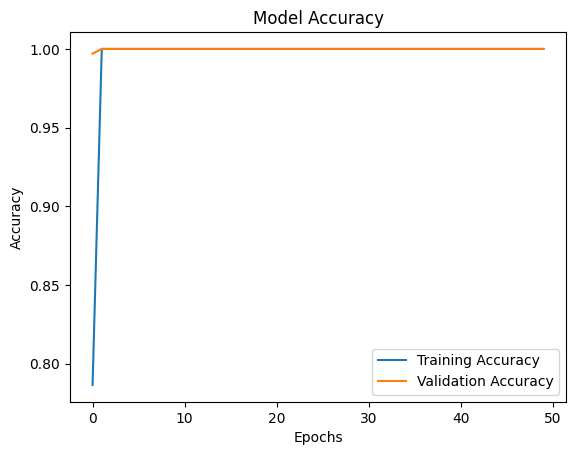

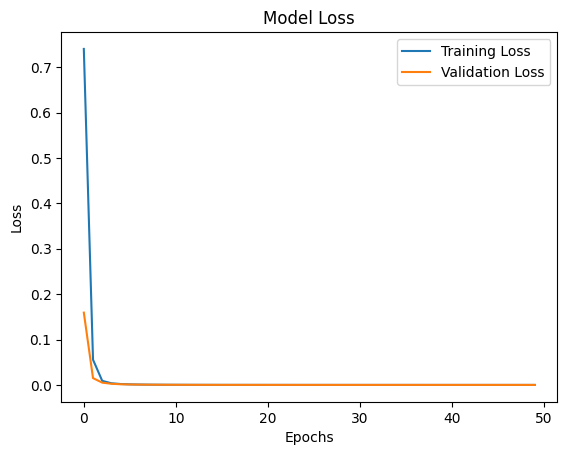

In [ ]:
import matplotlib.pyplot as plt
# Plot akurasi selama pelatihan
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss selama pelatihan
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


##SAVE MODEL

In [ ]:
model.save('/content/rekomendasi_olahraga_model.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('/content/rekomendasi_olahraga_model.h5')

In [ ]:
import numpy as np

# Contoh input baru (sesuaikan dengan fitur yang diperlukan)
# Format: [Tinggi (cm), Berat (kg), Durasi (menit), Kalori Terbakar, Umur, 'Tingkat Aktivitas', 'Tujuan', 'Kategori', 'Jenis Kelamin']
new_input = pd.DataFrame([{
    'Tinggi (cm)': 170,
    'Berat (kg)': 65,
    'Durasi (menit)': 45,
    'Kalori Terbakar': 350,
    'Umur': 25,
    'Tingkat Aktivitas': 'Sedang',
    'Tujuan': 'Pemeliharaan Kebugaran',
    'Kategori': 'Kardio',
    'Jenis Kelamin': 'Pria'
}])

In [ ]:
# Preprocessing input
# Encoding fitur kategorikal
new_input_encoded = pd.get_dummies(new_input[categorical_features])
missing_cols = set(X_encoded.columns) - set(new_input_encoded.columns)
for col in missing_cols:
    new_input_encoded[col] = 0  # Menambahkan kolom yang hilang (karena one-hot encoding)
new_input_encoded = new_input_encoded[X_encoded.columns]  # Menyesuaikan urutan kolom

In [ ]:
# Normalisasi fitur numerik
new_input_combined = new_input[numeric_features].copy()
new_input_combined[numeric_features] = scaler.transform(new_input_combined[numeric_features])
new_input_combined = pd.concat([new_input_combined, new_input_encoded], axis=1)

In [ ]:
# Prediksi dengan model
prediction = model.predict(new_input_combined)
predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])
print(f'Rekomendasi Olahraga: {predicted_class[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Rekomendasi Olahraga: Bersepeda
